In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import time

from alphabt import *


# 作多

In [2]:

Data.datasource = 'yfapi'
data = Data().get_data(ticker='T', startdate='2000', enddate='2020')

# 回測策略:
  * 5MA、25MA 黃金交叉 以及 成交量大於20MA成交量
  * 5MA、25MA 死叉

### 單純作多

In [3]:


class _250MA(Strategy):
    
    def __init__(self):
        self.data = data
        self.vol_20 = self.data.volume.rolling(20).mean().values
        self.ma25 = self.indicator('MA', 25)['MA'].values
        self.ma5 = self.indicator('MA', 5)['MA'].values

        
    def signal(self, index):
        super().signal(index)

        buy_con = (self.ma25[index - 1] > self.ma5[index - 1]) & (self.ma25[index] < self.ma5[index]) & (self.data.volume[index] >= self.vol_20[index])
                   
        sell_con = (self.ma25[index - 1] < self.ma5[index - 1]) & (self.ma25[index] > self.ma5[index])
        
        if (buy_con) & (self.empty_position):
#             print(11111)
            self.long(stop_loss=0.01)
            
        if (sell_con) :

            self.close()
        
    
    



In [4]:
%%time
bt = Backtest(_250MA, initital_equity=10000, commission=None)
bt.run()
log = bt.get_report()


136 136
0 0
CPU times: user 901 ms, sys: 5.3 ms, total: 907 ms
Wall time: 908 ms


In [5]:
print(log.shape)
log.head(10)



(68, 11)


Ticket  unit action  EntryDate  EntryPrice  EntryCommission   ExitDate  \
0      T     1   long 2000-04-06       34.79              0.0 2000-04-19   
1      T     1   long 2000-05-02       33.61              0.0 2000-05-03   
2      T     1   long 2000-06-05       34.22              0.0 2000-07-03   
3      T     1   long 2001-02-26       37.55              0.0 2001-03-05   
4      T     1   long 2001-07-12       31.61              0.0 2001-08-21   
5      T     1   long 2001-09-19       34.44              0.0 2001-10-17   
6      T     1   long 2001-12-18       30.21              0.0 2002-01-14   
7      T     1   long 2002-05-17       26.06              0.0 2002-06-07   
8      T     1   long 2002-12-19       20.59              0.0 2003-01-22   
9      T     1   long 2003-04-02       16.16              0.0 2003-04-15   

   ExitPrice  Tax  ExitCommission    Equity  
0      31.30  0.0             0.0  9996.507  
1      31.96  0.0             0.0  9994.855  
2      33.33  0.0             0.0  9993.958  
3      34.82  0.0             0.0  9991.224  
4      33.19  0.0             0.0  9992.810  
5      32.77  0.0             0.0  9991.140  
6      28.61  0.0             0.0  9989.539  
7      24.43  0.0             0.0  9987.915  
8      20.22  0.0             0.0  9987.545  
9      16.05  0.0             0.0  9987.432

In [6]:
# per

In [7]:
# Backtest(_250MA).get_plot(subplot_technical_index=['MA'], overlap=['TEMA'], sub_plot_param={'MA':[5, 25]}, overlap_param=None, log=log)


# 回測策略:
  * 前一天收盤價大於5ma
  * 5MA、25MA 死叉

### 作多 + 加倉

In [8]:

class _250MA2(Strategy):
    
    def __init__(self):
        self.data = data
        self.vol_20 = self.data.volume.rolling(20).mean().values
        self.ma25 = self.indicator('MA', 25)['MA'].values
        self.ma5 = self.indicator('MA', 5)['MA'].values
        
        self.long_count = 0
        self.close_count = 0

        
    def signal(self, i):
        super().signal(i)
        buy_con = (self.data.close.values[i - 1] > self.ma5[i - 1]) #& (self.ma25[i] < self.ma5[i]) & (self.data.volume[i] >= self.vol_20[i])
                   
        sell_con = (self.ma25[i - 1] < self.ma5[i - 1]) & (self.ma25[i] > self.ma5[i])
        
        if (buy_con) :

#             self.long()
            self.long(stop_loss=0.1)

            
        if (sell_con) :
          
            self.close()
        


In [10]:
%%time
bt = Backtest(_250MA2, initital_equity=10000, commission=0.01)
bt.run()
log2 = bt.get_report()

5206 5206
0 0
CPU times: user 1.03 s, sys: 5.85 ms, total: 1.03 s
Wall time: 1.03 s


In [11]:
print(log2.shape)
log2.head(10)

(2603, 11)


Ticket  unit action  EntryDate  EntryPrice  EntryCommission   ExitDate  \
0      T     1   long 2000-01-12       32.85         0.328550 2000-01-27   
1      T     1   long 2000-01-25       30.97         0.309668 2000-02-15   
2      T     1   long 2000-01-26       30.59         0.305891 2000-02-15   
3      T     1   long 2000-02-02       32.48         0.324773 2000-02-15   
4      T     1   long 2000-02-03       32.48         0.324773 2000-02-15   
5      T     1   long 2000-02-04       31.72         0.317221 2000-02-15   
6      T     1   long 2000-02-07       31.25         0.312500 2000-02-15   
7      T     1   long 2000-02-11       31.72         0.317221 2000-02-15   
8      T     1   long 2000-03-01       30.26         0.302587 2000-04-03   
9      T     1   long 2000-03-02       32.48         0.324773 2000-04-03   

   ExitPrice  Tax  ExitCommission    Equity  
0      29.46  0.0        0.294562  9933.807  
1      30.21  0.0        0.302115  9802.471  
2      30.21  0.0        0.302115  9832.380  
3      30.21  0.0        0.302115  9862.289  
4      30.21  0.0        0.302115  9892.199  
5      30.21  0.0        0.302115  9922.108  
6      30.21  0.0        0.302115  9952.018  
7      30.21  0.0        0.302115  9981.927  
8      32.10  0.0        0.320997  9614.693  
9      32.10  0.0        0.320997  9646.471

In [5]:
data

open       high        low      close   adjclose    volume  \
2000-01-03  36.678623  37.009064  35.215256  35.498489   7.278189   7668476   
2000-01-04  35.545696  36.064957  32.854984  33.421452   6.852337   9497846   
2000-01-05  33.987915  34.176739  33.563065  33.940708   6.958801  12035160   
2000-01-06  33.657478  33.987915  32.571751  33.043808   6.823967   9471366   
2000-01-07  33.657478  33.799095  32.760574  33.327038   6.882461   7792534   
...               ...        ...        ...        ...        ...       ...   
2019-12-24  29.531721  29.546827  29.380665  29.425982  22.160547  11515093   
2019-12-26  29.448641  29.607250  29.433535  29.577040  22.274307  26239032   
2019-12-27  29.637463  29.728098  29.607250  29.637463  22.319811  20430247   
2019-12-30  29.660122  29.667673  29.441088  29.486404  22.206045  23389652   
2019-12-31  29.463745  29.539274  29.350452  29.516617  22.228804  26766646   

           ticker       date  
2000-01-03      T 2000-01-03  
2000-01-04      T 2000-01-04  
2000-01-05      T 2000-01-05  
2000-01-06      T 2000-01-06  
2000-01-07      T 2000-01-07  
...           ...        ...  
2019-12-24      T 2019-12-24  
2019-12-26      T 2019-12-26  
2019-12-27      T 2019-12-27  
2019-12-30      T 2019-12-30  
2019-12-31      T 2019-12-31  

[5031 rows x 8 columns]

In [23]:
per2

年度總損益(元)  作多次數(次)  作空次數(次)  交易總次數(次)  勝率(%)    獲利因子  最大損失(元)   最大獲利(元)  \
2000 -110487.38       10        0        10  30.00   0.756 -99998.0  254467.0   
2001  -55392.07        7        0         7  42.86   0.556 -61330.0   43258.0   
2002 -172368.48        9        0         9  22.22   0.428 -88586.0   75933.0   
2003 -128982.27       10        0        10  20.00   0.506 -65295.0  116517.0   
2004   21091.09        8        0         8  50.00   1.270 -38501.0   48124.0   
2005  -35012.33       14        0        14  14.29   0.366 -14820.0   14720.0   
2006  103324.18        6        0         6  50.00   3.097 -24809.0  105353.0   
2007   45715.27        9        0         9  66.67   1.469 -74206.0   45094.0   
2008 -179132.79       12        0        12  33.33   0.312 -64947.0   37657.0   
2009  -48931.44        9        0         9  44.44   0.611 -46186.0   38223.0   
2010   61974.29        5        0         5  60.00   2.516 -35371.0   73919.0   
2011  -31438.50       10        0        10  30.00   0.608 -35130.0   45778.0   
2012   43954.26        8        0         8  50.00   1.794 -37330.0   74812.0   
2013    -266.79        7        0         7  28.57   0.997 -31676.0   51255.0   
2014   14976.17        9        0         9  33.33   1.206 -21040.0   46894.0   
2015  -19935.49        4        0         4  25.00   0.604 -29191.0   30360.0   
2016  107125.05        5        0         5  80.00   6.787 -18513.0   67783.0   
2017  -61105.83        6        0         6  66.67   0.316 -56565.0   20236.0   
2018 -105844.01       10        0        10  30.00   0.340 -57515.0   52309.0   
2019   85229.87        7        0         7  85.71  14.087  -6513.0   54050.0   
2020 -151175.53       10        0        10  20.00   0.088 -51206.0    7542.0   

     個股年度報酬(%)  當年度報酬率(%)  平均交易報酬率(%)  累積年度報酬(%)  當年度權益報酬率(%)  權益累積年度報酬(%)  \
2000     -1.67     -11.05       -1.10     -11.05       -11.05       -11.05   
2001    -17.64      -6.23       -0.89     -16.59        -6.23       -16.59   
2002    -30.93     -20.67       -2.30     -33.82       -20.66       -33.82   
2003     -6.56     -19.49       -1.95     -46.72       -19.49       -46.72   
2004     -1.15       3.96        0.50     -44.61         3.96       -44.61   
2005     -5.74      -7.23       -0.52     -48.62        -6.32       -48.12   
2006     45.98      19.92        3.32     -38.39        19.91       -37.78   
2007     16.51       7.35        0.82     -33.86         7.35       -33.21   
2008    -31.34     -26.41       -2.20     -51.33       -26.82       -51.12   
2009     -2.47     -10.01       -1.11     -56.20       -10.01       -56.02   
2010      3.41      14.09        2.82     -50.03        14.09       -49.82   
2011      1.89      -6.27       -0.63     -53.16        -6.27       -52.96   
2012     10.67       9.35        1.17     -48.78         9.34       -48.57   
2013      2.24      -2.40       -0.34     -50.01        -0.05       -48.60   
2014     -4.68       2.91        0.32     -48.56         2.91       -47.10   
2015      2.44      -3.77       -0.94     -50.50        -3.77       -49.09   
2016     24.79      21.04        4.21     -40.08        21.04       -38.38   
2017     -8.92      -9.92       -1.65     -46.02        -9.92       -44.49   
2018    -26.93     -21.34       -2.13     -57.54       -19.07       -55.07   
2019     37.12      18.97        2.71     -49.49        18.97       -46.55   
2020    -26.56     -28.29       -2.83     -63.78       -28.28       -61.67   

          權益  年化報酬率(%)  權益年化報酬率(%)  大盤年化報酬率(%)  
2000  889513    -11.05      -11.05       -9.27  
2001  834121     -8.67       -8.67      -11.18  
2002  661752    -12.86      -12.86      -15.44  
2003  532770    -14.56      -14.56       -6.51  
2004  553861    -11.14      -11.14       -3.59  
2005  518849    -10.50      -10.36       -2.52  
2006  622173     -6.69       -6.55       -0.37  
2007  667888     -5.04       -4.92        0.11  
2008  488755     -7.69       -7.65       -5.16  
2009  439824     

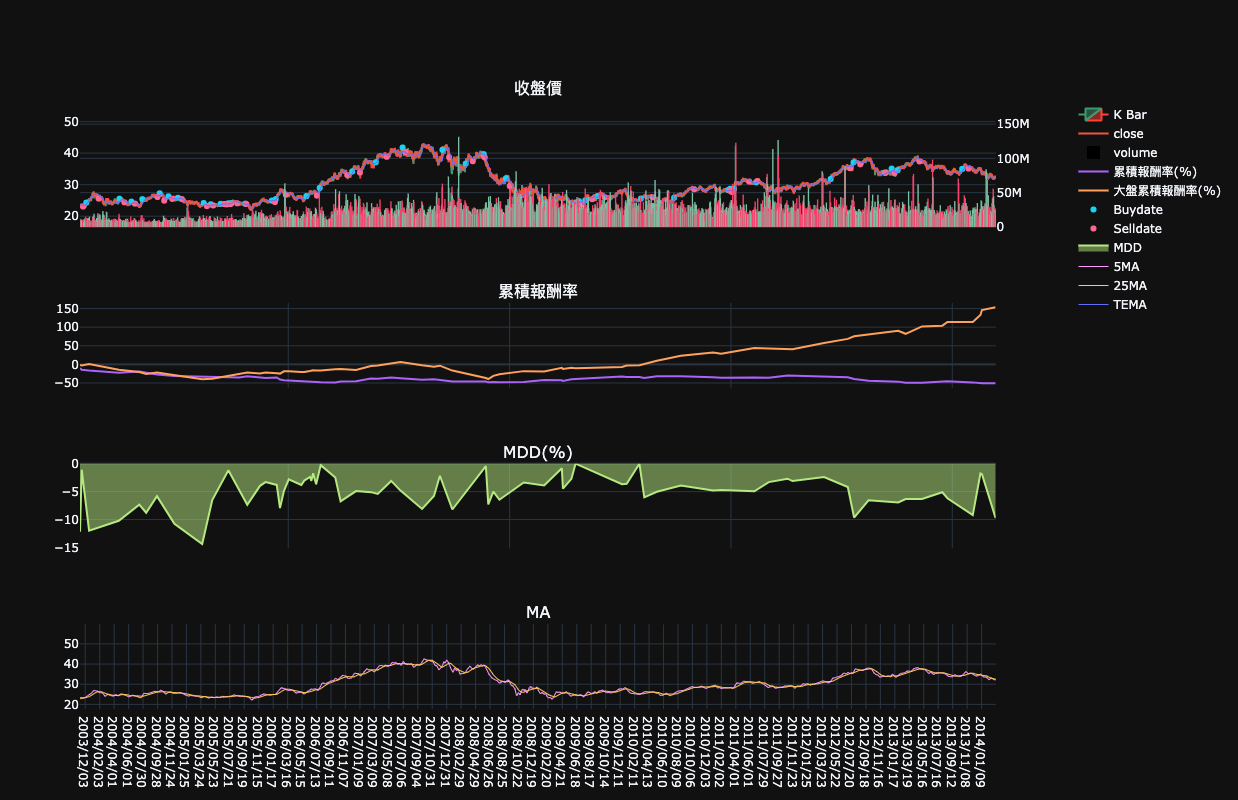

In [24]:
Bt(_250MA2).get_plot(subplot_technical_index=['MA'], overlap=['TEMA'], sub_plot_param={'MA':[5, 25]}, overlap_param=None, log=log)
